In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
%matplotlib inline

In [101]:
import os
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [142]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


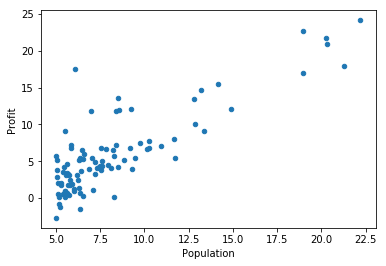

In [586]:
data.plot(kind='scatter', x='Population', y='Profit')

In [63]:
def computeCost(X,y, theta):
    part=np.power(((X*theta.T)-y),2)
    return np.sum(part)/(2*(len(X)))

In [102]:
data.insert(0,'Ones',1)

In [103]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [104]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [600]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [601]:
X=np.matrix(X.values)
y = np.matrix(y.values)

In [565]:
theta=(np.matrix(np.array([0,0])))

In [602]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [603]:
ComputeCost(X,y,theta)

32.072733877455676

In [52]:
def GradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(X*theta.T)-y
        
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-((alpha/(len(X)))*np.sum(term))
            
        theta=temp
        cost[i]= computeCost(X,y,theta)
    return theta,cost

In [53]:
alpha=0.01
iters=1500

In [604]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [306]:
computeCost(X,y,g)

4.4833882565877259

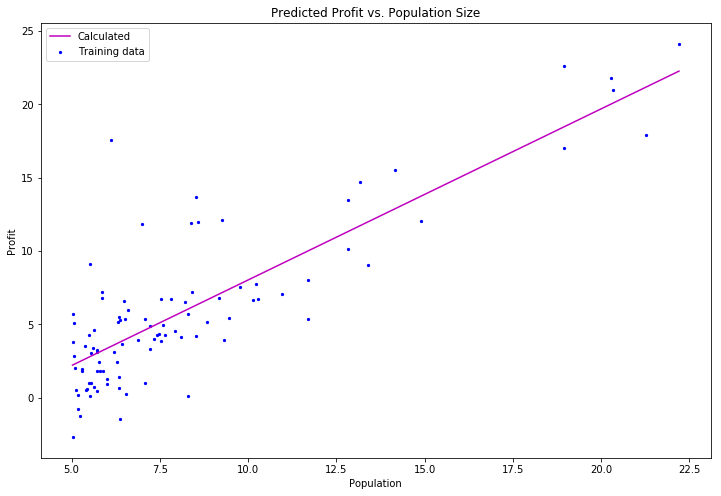

In [575]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=g[0,0]+(g[0,1]*x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'m',label='Calculated')
ax.scatter(data.Population,data.Profit,s=5,c='b',label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')


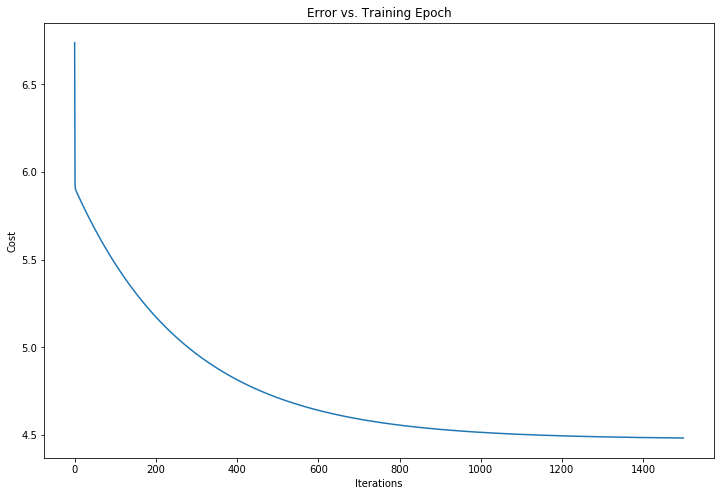

In [308]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [573]:
def alphaTest(startAlpha,jumpAlpha,itersAlpha):
    costs=np.zeros(itersAlpha)
    for i in range (itersAlpha):
        alphaT=startAlpha+jumpAlpha*i
        a,b=GradientDescent(X,y,theta,alphaT,iters)
        costs[i]=b[-1]
    return costs

In [611]:
startAlpha=0.0001
jumpAlpha=0.002
itersAlpha=10
costsAlpha=np.zeros((itersAlpha,2))
costsAlpha[0,0]

0.0

In [605]:
alphasCosts=alphaTest(startAlpha,jumpAlpha,itersAlpha)

In [451]:
alphasCosts


array([ 4.48338826,  4.48186553,  4.48070406,  4.47981816,  4.47914246,
        4.4786271 ,  4.47823404,  4.47793427,  4.47770565,  4.4775313 ,
        4.47739833,  4.47729694,  4.47721962,  4.47716065,  4.47711569,
        4.47708141,  4.47705527,  4.47703533,  4.47702014,  4.47700855])

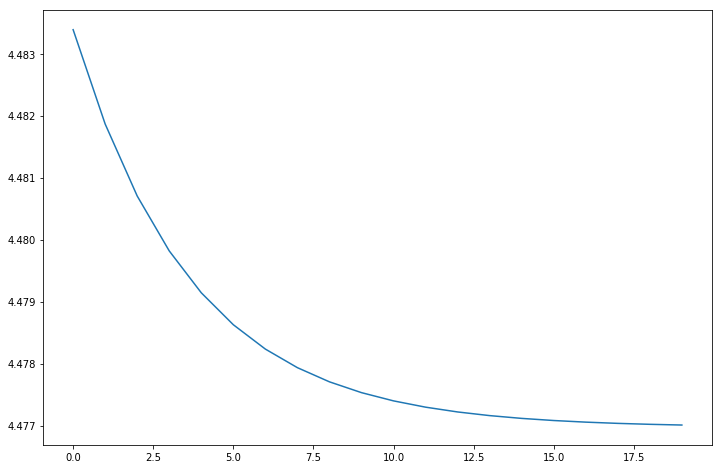

In [365]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(itersAlpha),alphasCosts)


In [535]:
def itersTest(startIters,jumpIters,itersIters):
    costs=np.zeros(itersIters)
    for i in range (itersIters):
        itersT=int(startIters+jumpIters*i)
        a,b=GradientDescent(X,y,theta,alpha,itersT)
        costs[i]=b[len(b)-1]
    return costs

In [568]:
startIters=100
jumpIters=400
itersIters=10
costsIters=np.zeros((itersIters,2))
costsIters[0,0]

0.0

In [606]:
itersCost=itersTest(startIters,jumpIters,itersIters)

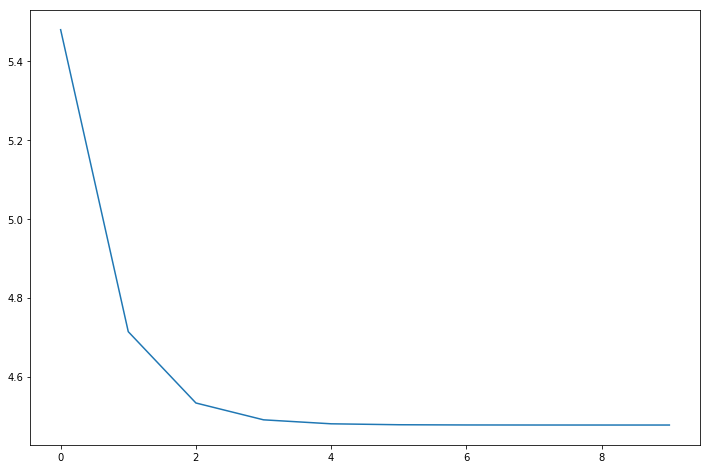

In [650]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(itersIters),itersCost)

In [716]:
def sickTest(startIters,jumpIters,itersIters,startAlpha,jumpAlpha,itersAlpha):
    costs=np.zeros((itersIters,itersAlpha))
    for i in range(itersIters):
        itersT=int(startIters+jumpIters*i)
        for j in range(itersAlpha):
            alphaT=startAlpha+jumpAlpha*j
            a,b=GradientDescent(X,y,theta,alphaT,itersT)
            costs[i,j]=b[-1]
        print((i+1)*(j+1))
    return costs

In [741]:
costTotal=sickTest(startIters,jumpIters,itersIters,startAlpha,jumpAlpha,itersAlpha)

10
20
30
40
50
60
70
80
90
100


In [747]:
costTotalAdj=costTotal
costTotalAdj=np.log10(costTotalAdj)
costTotalAdj=costTotalAdj.tolist()
type(costTotalAdj)

list

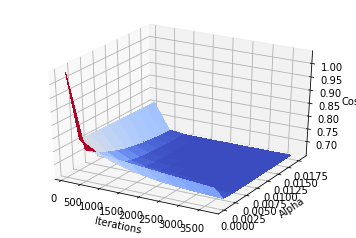

In [748]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

A = np.arange(startIters,startIters+itersIters*jumpIters,jumpIters)
B = np.arange(startAlpha,startAlpha+itersAlpha*jumpAlpha,jumpAlpha)
A, B = np.meshgrid(A, B)
Z = costTotalAdj

# Plot the surface.
surf = ax.plot_surface(A, B, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xlabel('Iterations')
ax.set_ylabel('Alpha')
ax.set_zlabel('Cost')

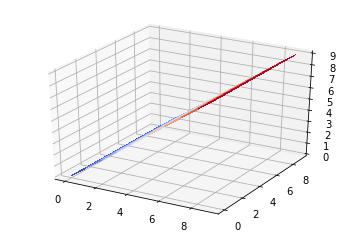

In [708]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

A = np.arange(10)
B = np.arange(10)
A, B = np.meshgrid(A, B)
Z = np.arange(10)

# Plot the surface.
surf = ax.plot_surface(A, B, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

In [22]:
path = os.getcwd() + '\data\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [47]:
data2.insert(0, 'Ones', 1)
cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

In [110]:
X=np.matrix(X.values)
y=np.matrix(y.values)

In [111]:
theta=np.matrix(np.array([0,0,0]))
X

matrix([[  1.    ,   6.1101],
        [  1.    ,   5.5277],
        [  1.    ,   8.5186],
        [  1.    ,   7.0032],
        [  1.    ,   5.8598],
        [  1.    ,   8.3829],
        [  1.    ,   7.4764],
        [  1.    ,   8.5781],
        [  1.    ,   6.4862],
        [  1.    ,   5.0546],
        [  1.    ,   5.7107],
        [  1.    ,  14.164 ],
        [  1.    ,   5.734 ],
        [  1.    ,   8.4084],
        [  1.    ,   5.6407],
        [  1.    ,   5.3794],
        [  1.    ,   6.3654],
        [  1.    ,   5.1301],
        [  1.    ,   6.4296],
        [  1.    ,   7.0708],
        [  1.    ,   6.1891],
        [  1.    ,  20.27  ],
        [  1.    ,   5.4901],
        [  1.    ,   6.3261],
        [  1.    ,   5.5649],
        [  1.    ,  18.945 ],
        [  1.    ,  12.828 ],
        [  1.    ,  10.957 ],
        [  1.    ,  13.176 ],
        [  1.    ,  22.203 ],
        [  1.    ,   5.2524],
        [  1.    ,   6.5894],
        [  1.    ,   9.2482],
        [ 

In [60]:
g, cost = GradientDescent(X,y,theta,alpha,iters)

In [65]:
computeCost(X,y,g)

0.13068670606095906

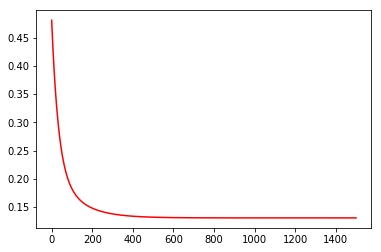

In [66]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),cost,'r')

In [106]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

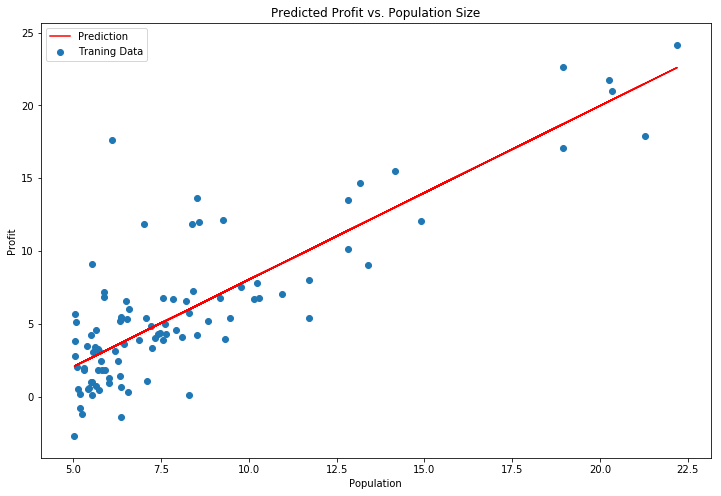

In [115]:
x=np.array(X[:, 1])
f=model.predict(X)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')